# Road Accident Severity Classification

<h2 id="description">Description</h2>
<ul>
  <li>This data set is collected from Addis Ababa Sub-city police departments for master's research work.</li>
  <li>The data set has been prepared from manual records of road traffic accidents of the year 2017-20.</li>
  <li>All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident.</li>
</ul>

<h2 id = 'problem-statement'>Problem Statement</h2>
<ul>
  <li>The target feature is <code>Accident_severity</code> which is a <strong>multi-class</strong> variable.</li>
  <li>The task is to classify the target variable based on the other 31 features.</li>
  <li>The metric used for evaluation is <strong>f1-score</strong>.</li>
</ul>

<h2 id="loading-necessary-libraries">Loading necessary libraries</h2>
<ul>
  <li><strong>NumPy:</strong> A library for numerical operations in Python.</li>
  <li><strong>Pandas:</strong> A powerful library for data manipulation and analysis.</li>
  <li><strong>Matplotlib:</strong> A library for creating static, interactive, and animated visualizations in Python.</li>
  <li><strong>Seaborn:</strong> A data visualization library based on Matplotlib for making attractive and informative statistical graphics.</li>
</ul>


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the version of the library installed in the Environment. 
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Matplotlib plots appear directly within the notebook, enhancing the interactivity
%matplotlib inline

# Dark visual theme and 'pastel' color palette for Seaborn plots.
sns.set_theme(style="dark")
sns.set_palette("pastel")


# Suppresssing non-critical warnings to maintain clean and uncluttered output for better readability.
import warnings
warnings.filterwarnings('ignore')

# Display all columns without truncation
pd.set_option('display.max_columns', None)

Numpy version: 1.25.2
Pandas version: 2.1.0
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


<h2 id = "function-definations">Function Definations</h2>

In [1]:
# 1. Function prints the number of columns in a DataFrame and lists their names in square brackets, separated by commas. 
def columns_in_a_dataframe(dataframe):

    dataframe_columns = dataframe.columns.tolist()
    print(f"Number of columns: {len(dataframe_columns)}")
    print(f"{dataframe_columns}\n")


# 2. Function distinguishes columns in a DataFrame based on their data types
def distinguish_column_ac_to_datatype(dataframe):
    data_types = {
        'Numerical': ['number'],
        'Categorical': ['category', 'object'],
        'Datetime': ['datetime', 'datetime64[ns]']
    }
    
    for dtype, dtype_list in data_types.items():
        columns = dataframe.select_dtypes(include=dtype_list).columns.tolist()
        if columns:
            print(f"Number of {dtype} columns: {len(columns)}")
            print(f"{columns}\n")
        else:
            print(f"No {dtype} column in your dataframe")


# 3. Function prints the number of missing value and percentage of missing values for each column having atleast one missing value
def missing_values_table(dataframe):
        
    mis_val = dataframe.isnull().sum()
    mis_val_percent = 100 * mis_val / len(dataframe)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(dataframe.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


# 4. Function prints unique values for each column when unique values in that column is less than or equal to max_unique_values.
def unique_values_per_column(dataframe, max_unique_values):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        
        if len(unique_values) <= max_unique_values:
            print(f"Column: {column}")
            print(f"Number of Unique values: {len(unique_values)}")
            print(f"Unique values: {', '.join(map(str, unique_values))}\n")


# 5. Function giving value count for each unique value sorted in descending order of occurance of each unique value
def unique_value_with_count(dataframe):
    for column in dataframe.columns:
        print(f"Column: {dataframe[column].value_counts().sort_values(ascending=False)}")
        print("\n")


# 6. Function plots histograms and boxplots for numerical columns in a DataFrame
def plot_numerical_histogram_boxplot(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number'])
    
    for column in numerical_columns.columns:
        plt.figure(figsize=(15,6))

        axes = plt.subplot(1,2,1)
        ax = sns.histplot(dataframe, x = column, bins = 20, edgecolor = 'black')

        ax.patch.set_edgecolor('black')
        ax.patch.set_linewidth(2)
        
        axes.set_xlabel(column)
        axes.set_ylabel('frequency')
        axes.set_title(f'Histogram of {column}')

        axes = plt.subplot(1,2,2)
        axbox = sns.boxplot(dataframe, y= column)

        axbox.patch.set_edgecolor('black')
        axbox.patch.set_linewidth(2)

        axes.set_ylabel(column)
        axes.set_title(f'Boxplot of {column}')

        # Adjust layout
        plt.tight_layout()
        plt.show()


# 7. Function to plot countplots of all categorical variables in an ascending order of count of each unique variable with unique values less than or equal to the argument unique_value_limit 
def plot_categorical_countplots(dataframe, unique_value_limit=10):
    categorical_columns = dataframe.select_dtypes(include=['object'])

    for column in categorical_columns.columns:
        unique_count = len(dataframe[column].unique())
        if unique_count <= unique_value_limit:
            plt.figure(figsize=(15, 6))
            ax = sns.countplot(data=dataframe, x=column, edgecolor= 'black' ,order= dataframe[column].value_counts(ascending=True).index)

            ax.patch.set_edgecolor('black')
            ax.patch.set_linewidth(2)
            
            plt.xticks(rotation=90)
            plt.title(f'Countplot of {column}')
            plt.xlabel('')

            total_count = len(dataframe[column])
            
            # Add text annotations for the count at the top and percentage in the middle of each bar
            for p in ax.patches:
                height = p.get_height()
                height = int(height)
                percentage = (height / total_count) * 100
                x = p.get_x() + p.get_width() / 2.

                if percentage < 5:
                    y_top_percentage = height + 10
                    ax.annotate(f'{percentage:.2f}%',
                            (x, y_top_percentage),
                            ha='center', va='bottom', fontsize=12, color='black')
                else:
                    y_top = height + 10
                    ax.annotate(f'{height}',
                            (x, y_top),
                            ha='center', va='bottom', fontsize=12, color='black')
                    y_middle = height / 2
                    ax.annotate(f'{percentage:.2f}%',
                            (x, y_middle),
                            ha='center', va='center', fontsize=12, color='black')
            plt.show()


# 8. Function to plot countplot of categorical variable in an ascending order of count of each unique variable
def plot_single_categorical_countplot(dataframe, column_name):
    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    unique_count = len(dataframe[column_name].unique())

    if unique_count <= 20:
        plt.figure(figsize=(15, 6))
        ax = sns.countplot(data=dataframe, x=column_name, edgecolor='black', order=dataframe[column_name].value_counts(ascending=False).index)

        ax.patch.set_edgecolor('black')
        ax.patch.set_linewidth(2)

        plt.xticks(rotation=90)
        plt.title(f'Countplot of {column_name}')
        plt.xlabel('')

        total_count = len(dataframe[column_name])

        # Add text annotations for the count and percentage
        for p in ax.patches:
            height = p.get_height()
            height = int(height)
            percentage = (height / total_count) * 100
            x = p.get_x() + p.get_width() / 2.

            if percentage < 5:
                y_top_percentage = height + 10
                ax.annotate(f'{percentage:.2f}%',
                            (x, y_top_percentage),
                            ha='center', va='bottom', fontsize=12, color='black')
            else:
                y_top = height + 10
                ax.annotate(f'{height}',
                            (x, y_top),
                            ha='center', va='bottom', fontsize=12, color='black')
                y_middle = height / 2
                ax.annotate(f'{percentage:.2f}%',
                            (x, y_middle),
                            ha='center', va='center', fontsize=12, color='black')
        plt.show()

# 9. Function to plot countplot for discrete numerical columns.
def plot_single_numerical_countplot(dataframe, column_name):
    if column_name not in dataframe.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(15, 6))
    ax = sns.countplot(data=dataframe, x=column_name, edgecolor='black', order=dataframe[column_name].value_counts(ascending=False).index)
    
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(2)

    plt.xticks(rotation=90)
    plt.title(f'Countplot of {column_name}')
    plt.xlabel('')

    total_count = len(dataframe[column_name])

    # Add text annotations for the count
    for p in ax.patches:
        height = p.get_height()
        height = int(height)
        x = p.get_x() + p.get_width() / 2.
        y_top = height + 10
        ax.annotate(f'{height}',
                    (x, y_top),
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.show()


# 10. Function that imputes with mode when percentage of missing value is less than or equal to 10% and greater than that with a new value called 'Unknown'
def impute_categorical_missing(df):
    # Calculate the percentage of missing values for each column
    missing_percent = (df.isnull().sum() / len(df)) * 100

    # Define a threshold (10%) for deciding the imputation method
    threshold = 10

    # Iterate through columns with missing values
    for col in df.columns:
        if col in missing_percent.index:
            if missing_percent[col] <= threshold:
                # Impute missing values with the mode for columns with <= 10% missing
                mode_value = df[col].mode().values[0]
                df[col].fillna(mode_value, inplace=True)
            else:
                # Impute missing values with 'Unknown' for columns with > 10% missing
                df[col].fillna('Unknown', inplace=True)

    return df


# 11. Function to ordinally encode categorical variables

def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

<h2 id = 'reading-in-the-dataset'>Reading in the dataset</h2>

In [2]:
df = pd.read_csv('..\Dataset\RTA Dataset.csv')

<h2 id = 'exploratory-descriptive-analysiseda'>Exploratory Descriptive Analysis(EDA)<h2>

<h3 id = 'basic-data-inspection'>Basic Data Inspection</h3>

In [3]:
df_eda = df.copy(deep=True)

In [4]:
# Displaying the number of rows and columns
print(f"Shape of dataframe: {df_eda.shape}\n")

columns_in_a_dataframe(df_eda) #Function defined above
distinguish_column_ac_to_datatype(df_eda) #Function defined above

Shape of dataframe: (12316, 32)

Number of columns: 32
['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']

Number of Numerical columns: 2
['Number_of_vehicles_involved', 'Number_of_casualties']

Number of Categorical columns: 30
['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_

In [5]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

<!-- CSS Styling -->
<style>
.assumption {
    margin: 0 auto;
    width: 1200px;
    background-color: #FFFF99;
    border: 2px solid black;
    color: black;
}
.margin10{
    margin: 10px;
}
code{
    color : #ADD8E6;
}
</style>

<div class="assumption">
    <h3 class = "margin10">💭 Assumption:</h3> 
    <p class = "margin10">Features like <code>fitness_of_casuality</code>, <code>work_of_casuality</code>, <code>age_band_of_casuality</code>, <code>sex_of_casualty</code>, and <code>casualty_class</code>
 doesn't seem important to predict the <code>accident severity</code>.</p>
</div>

In [6]:
# Inspect the first 5 rows of data
df_eda.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
# Inspect the last 5 rows of the data
df_eda.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [8]:
# Inspect random 5 rows from the dataset.
df_eda.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9605,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,NaN,Owner,2-5yrs,NaN,Residential areas,One way,Steep grade downward with mountainous terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Getting off,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
5804,17:50:00,Friday,31-50,Male,Junior high school,Owner,Below 1yr,Long lorry,Owner,5-10yrs,NaN,Church areas,Undivided Two way,Steep grade downward with mountainous terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Moving Backward,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
3434,19:38:00,Thursday,18-30,Male,NaN,NaN,NaN,Lorry (41?100Q),Owner,Unknown,NaN,Residential areas,NaN,Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Darkness - lights lit,Normal,NaN,1,1,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
9893,11:45:00,Saturday,Over 51,Male,Junior high school,Employee,5-10yr,NaN,Owner,Unknown,No defect,Other,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Snow,Daylight,Snow,Vehicle with vehicle collision,3,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
7140,22:45:00,Friday,Unknown,Female,Unknown,Employee,Below 1yr,Automobile,Owner,5-10yrs,NaN,Residential areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,1,1,Turnover,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Overtaking,Serious Injury


<h3 id = 'descriptive-statistics'>Descriptive Statistics</h3>

In [9]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [10]:
df_eda.describe(include='O').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


<h3 id = 'duplicate-values'>Duplicate Values</h3>

In [11]:
print(f"Number of duplicate instances in the dataset: {df_eda.duplicated().sum()}")

Number of duplicate instances in the dataset: 0


<h3 id = 'missing-values'>Missing Values</h3>

In [12]:
missing_values_table(df_eda) #Function defined above

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


<h3 id = 'unique-values'>Unique Values</h3>

In [13]:
df_eda.nunique().sort_values(ascending=False)

Time                           1074
Cause_of_accident                20
Type_of_vehicle                  17
Area_accident_occured            14
Vehicle_movement                 13
Type_of_collision                10
Pedestrian_movement               9
Weather_conditions                9
Road_allignment                   9
Types_of_Junction                 8
Number_of_casualties              8
Work_of_casuality                 7
Lanes_or_Medians                  7
Day_of_week                       7
Driving_experience                7
Educational_level                 7
Service_year_of_vehicle           6
Age_band_of_casualty              6
Number_of_vehicles_involved       6
Fitness_of_casuality              5
Road_surface_type                 5
Age_band_of_driver                5
Casualty_severity                 4
Road_surface_conditions           4
Casualty_class                    4
Light_conditions                  4
Owner_of_vehicle                  4
Vehicle_driver_relation     

In [14]:
unique_values_per_column(df_eda,20)

Column: Day_of_week
Number of Unique values: 7
Unique values: Monday, Sunday, Friday, Wednesday, Saturday, Thursday, Tuesday

Column: Age_band_of_driver
Number of Unique values: 5
Unique values: 18-30, 31-50, Under 18, Over 51, Unknown

Column: Sex_of_driver
Number of Unique values: 3
Unique values: Male, Female, Unknown

Column: Educational_level
Number of Unique values: 8
Unique values: Above high school, Junior high school, nan, Elementary school, High school, Unknown, Illiterate, Writing & reading

Column: Vehicle_driver_relation
Number of Unique values: 5
Unique values: Employee, Unknown, Owner, nan, Other

Column: Driving_experience
Number of Unique values: 8
Unique values: 1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Licence, Below 1yr, unknown

Column: Type_of_vehicle
Number of Unique values: 18
Unique values: Automobile, Public (> 45 seats), Lorry (41?100Q), nan, Public (13?45 seats), Lorry (11?40Q), Long lorry, Public (12 seats), Taxi, Pick up upto 10Q, Stationwagen, Ridden hors

<!-- CSS Styling -->
<style>
.uniquev {
    margin: 0 auto;
    background-color: #ADD8E6; /* Pastel Blue */
    width: 1200px;
    padding: 10px;
    border: 2px solid black;
    color: black; /* Set the text color to black */
}
.margin10{
    margin: 10px;
}
code{
    color : #FFFF99;
}
</style>

<div class="uniquev">
    <h3 class = "margin10">🔍 Observations:</h3>
    <ol>
        <li>There are various values such as <code>Unknown</code>, <code>unknown</code>, <code>na</code>, <code>Other</code> and <code>Unknown or other</code> for indicating missing data values. It's necessary to standardize these representations into a uniform format.</li> 
        <li>Feature <code>Defect_of_vehicle</code> contains values <code>No defect</code>, <code>7</code> and <code>5</code>. As there is no context on what 7 and 5 mean, it seems better to use the value <code>"Defect present"</code> in place of 7 and 5.</li>
    </ol>
</div>

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


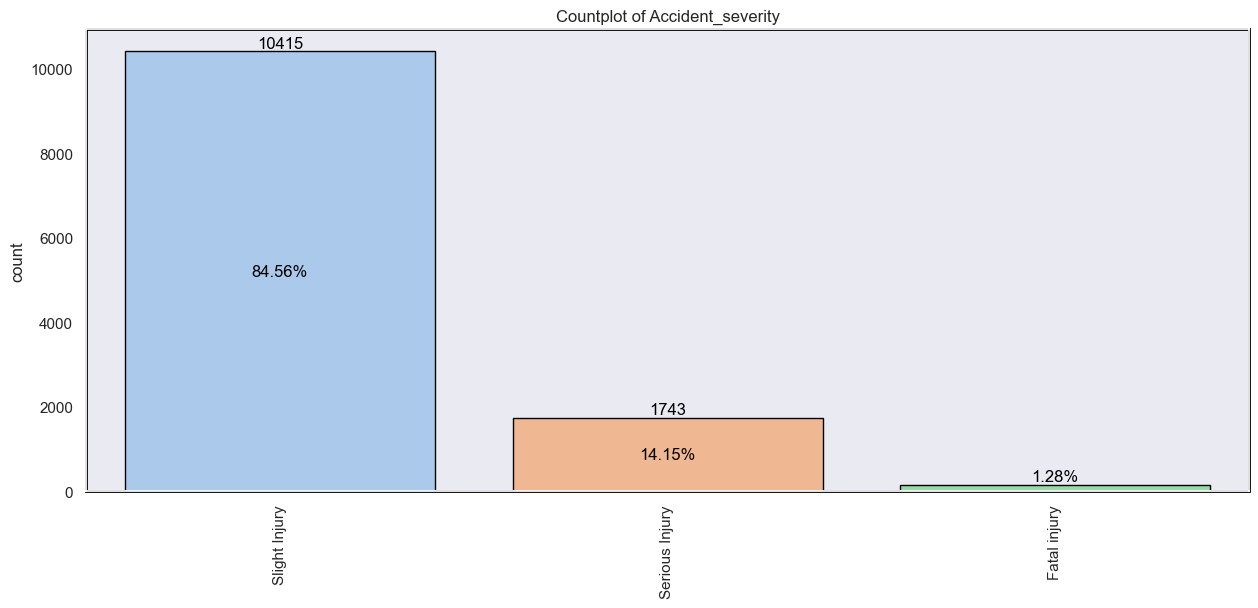

In [15]:
print(df_eda['Accident_severity'].value_counts())
plot_single_categorical_countplot(df_eda,'Accident_severity')

<!-- CSS Styling -->
<style>
.assumption {
    margin: 0 auto;
    width: 400px;
    background-color: #FFFF99;
    border: 2px solid black;
    color: black;
}
.margin10{
    margin: 10px;
}
code{
    color : #ADD8E6;
}
</style>

<center><div class="assumption">
    <h3 class = "margin10">📌 Imbalanced data set</h3> 
</div>
<center>

### Visualizing categorical variables

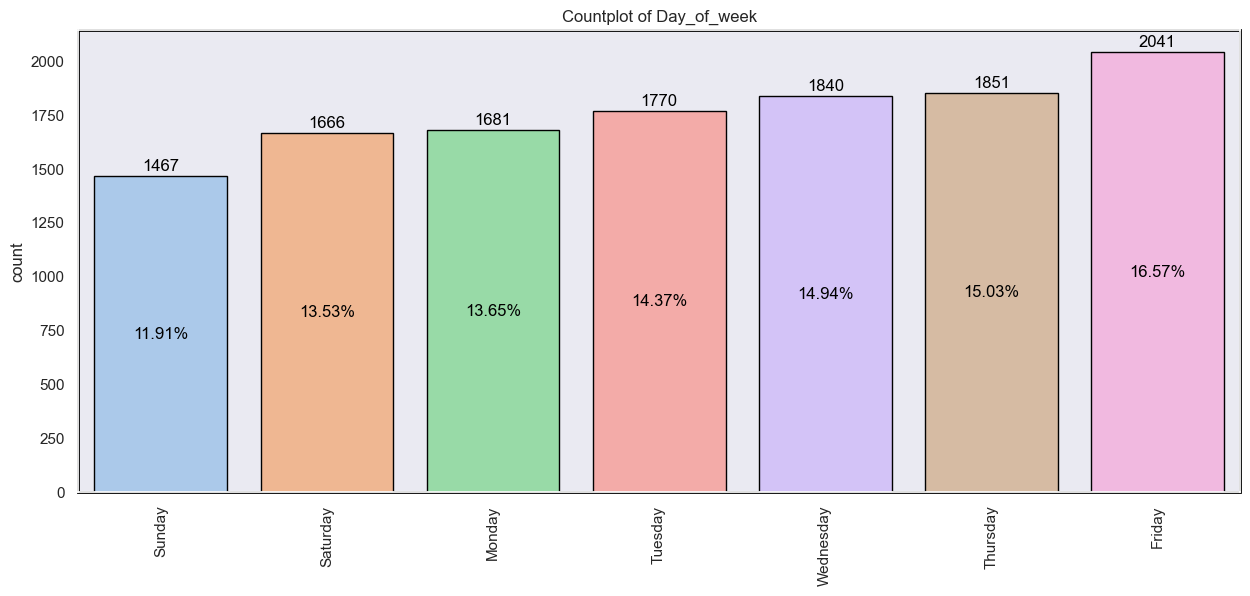

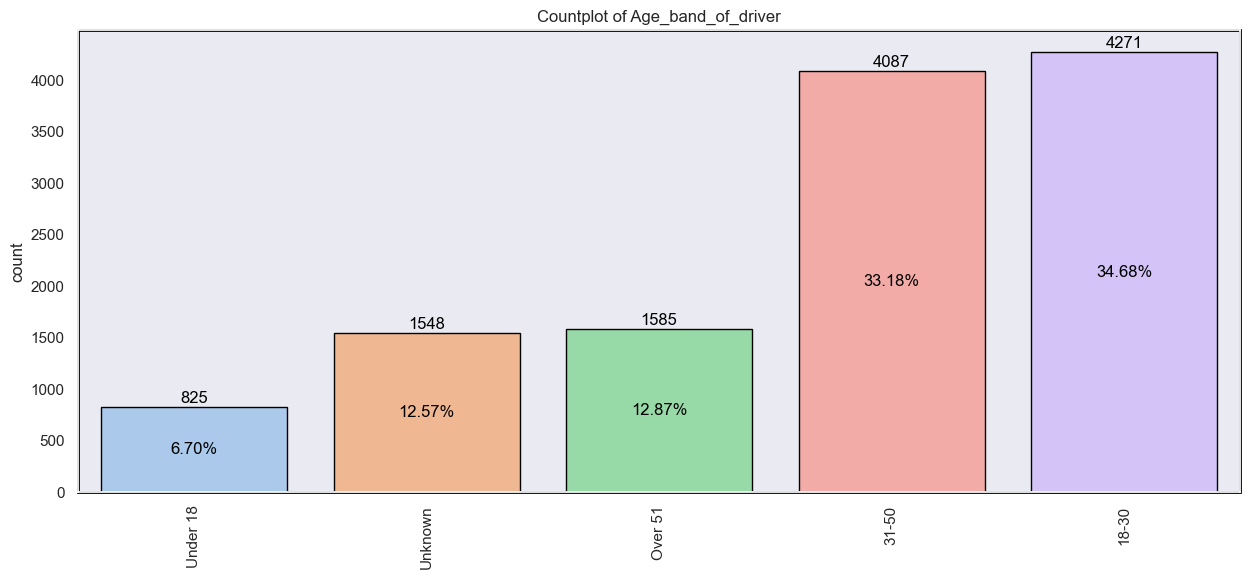

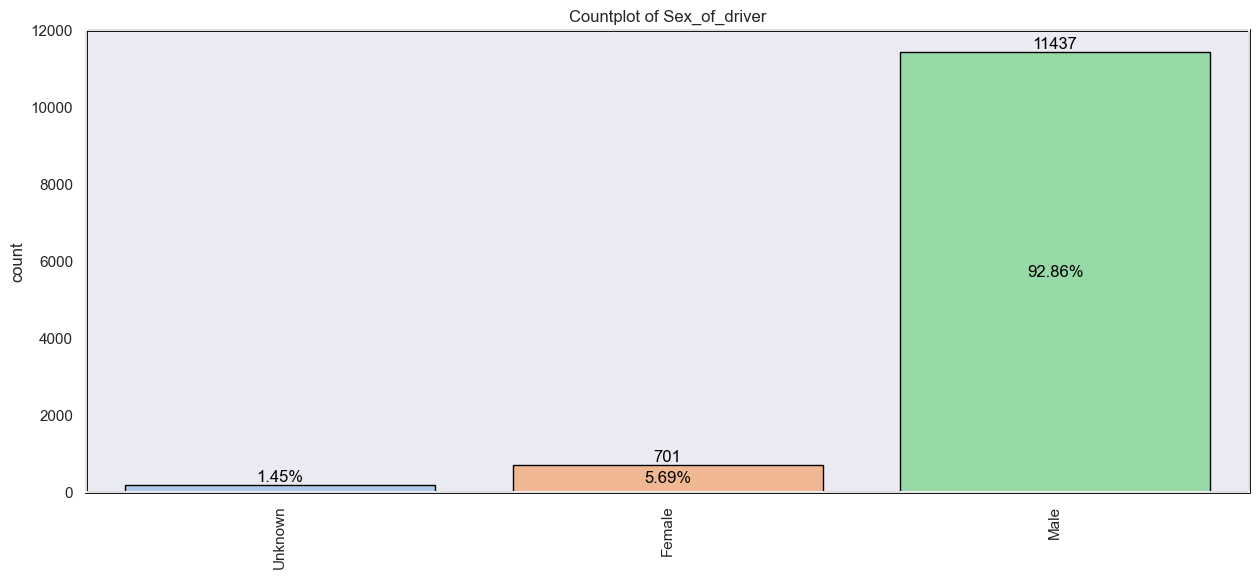

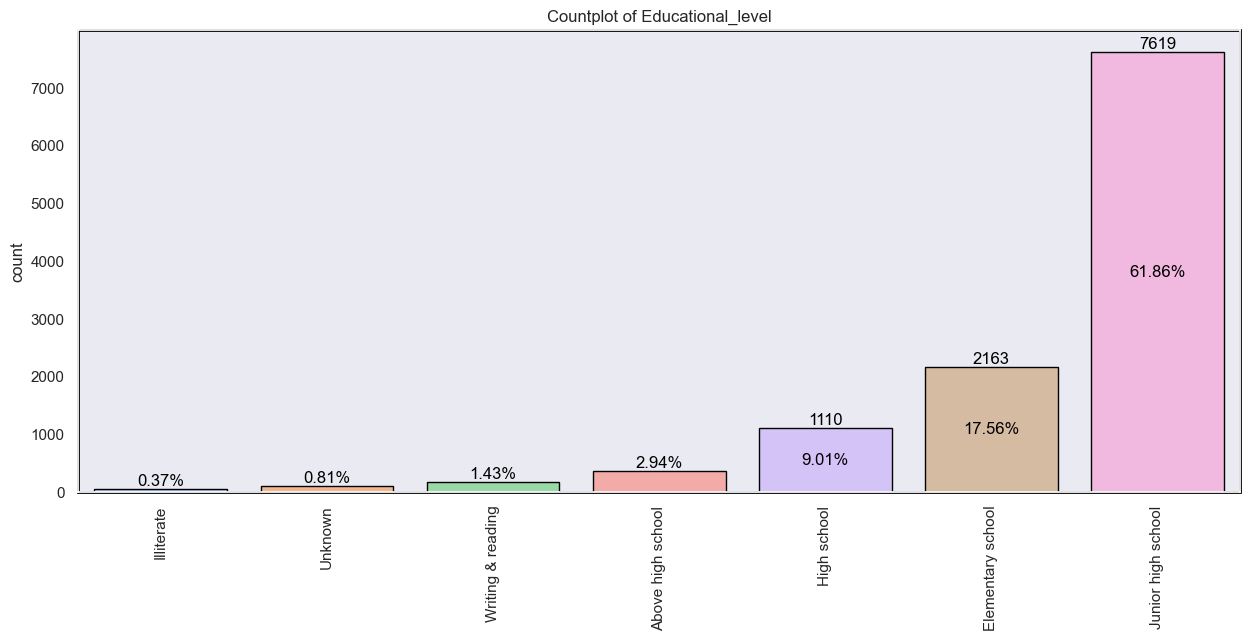

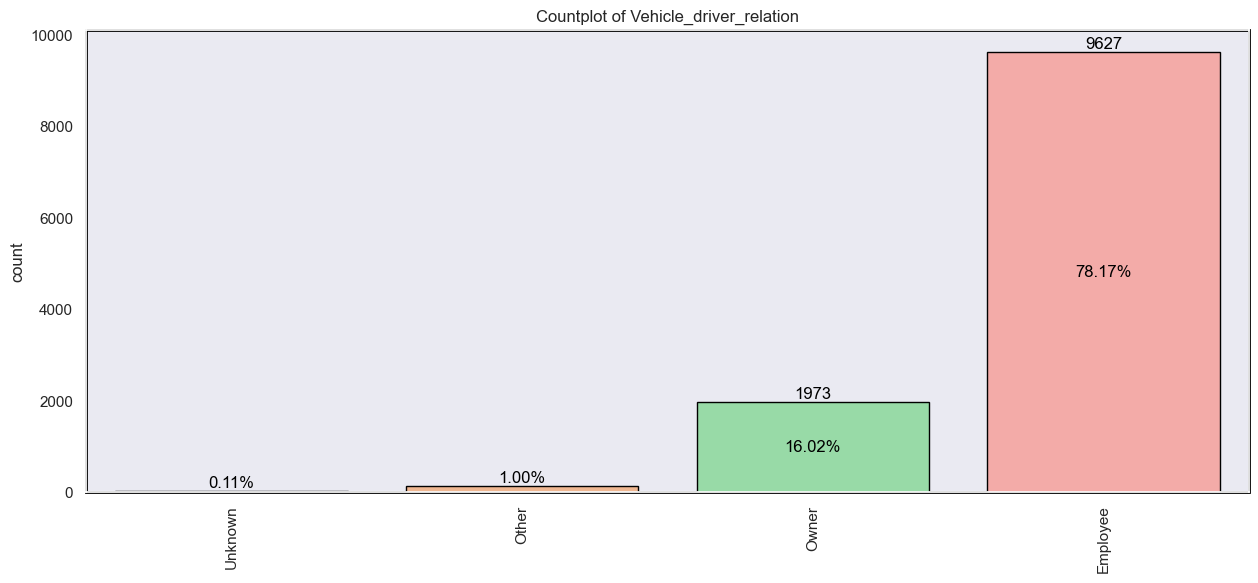

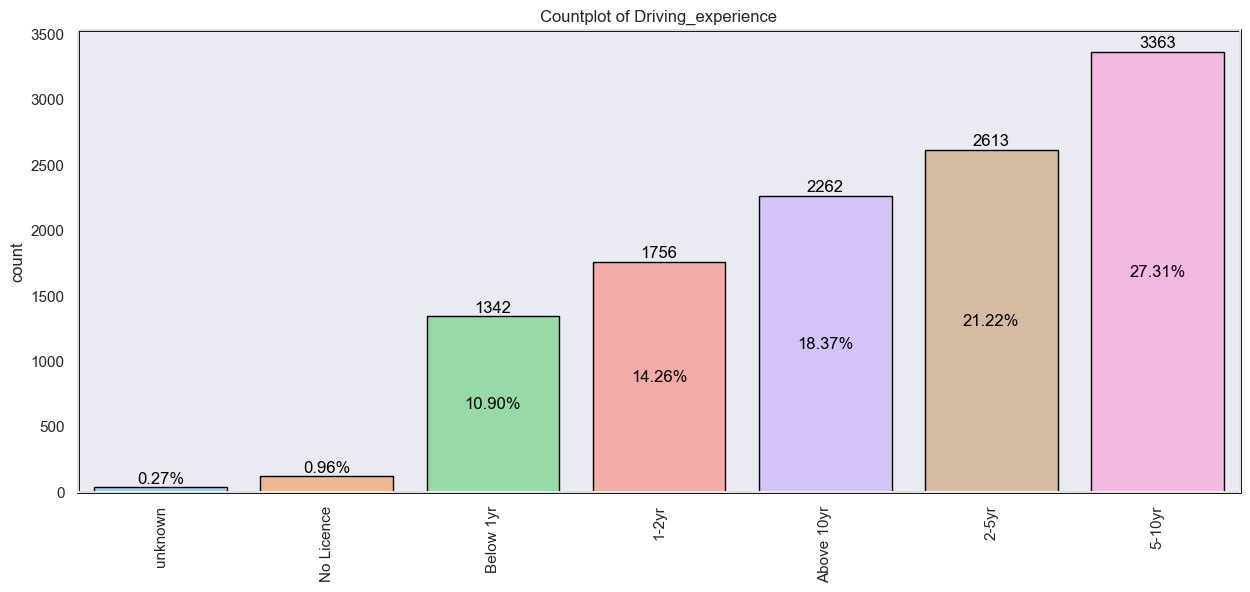

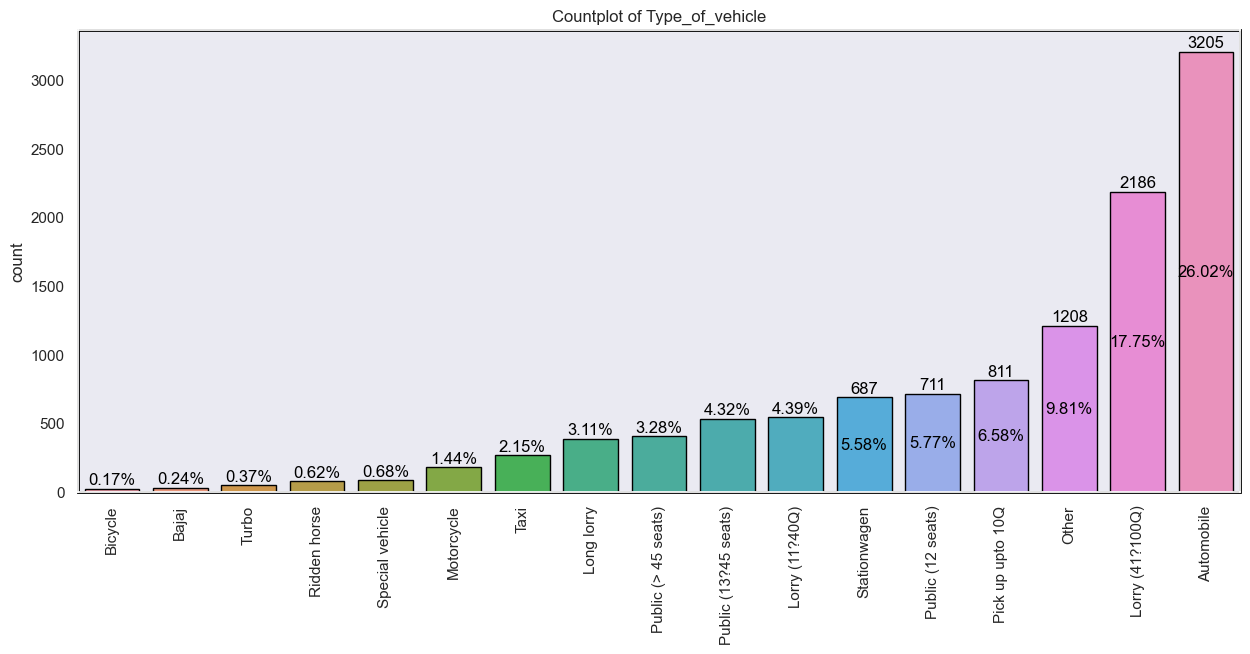

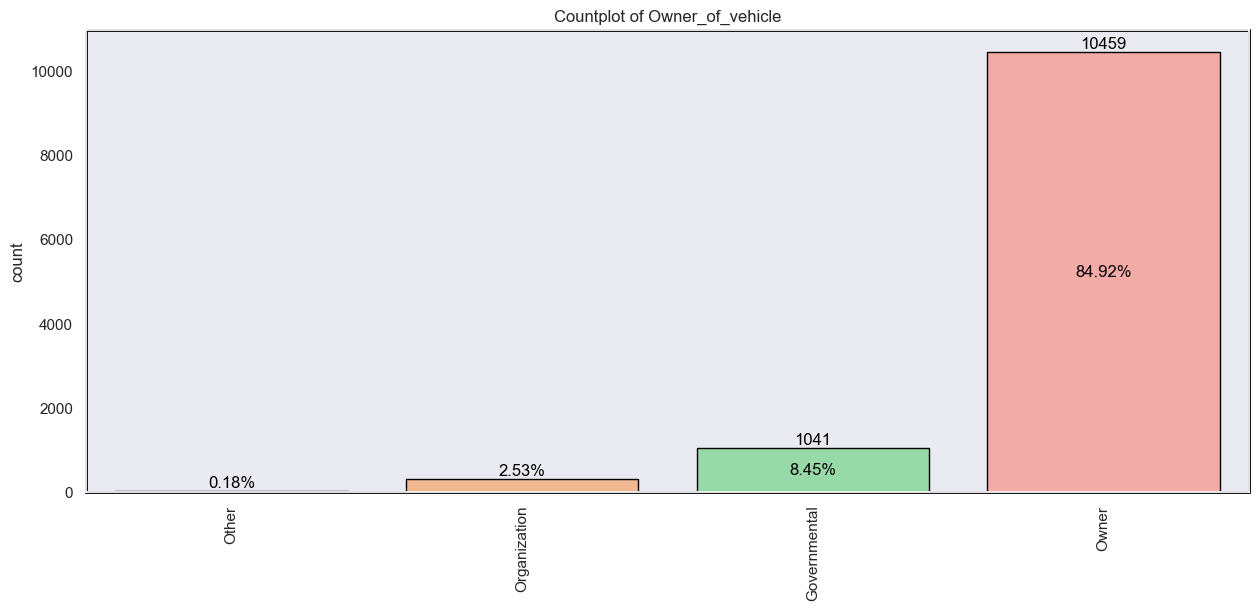

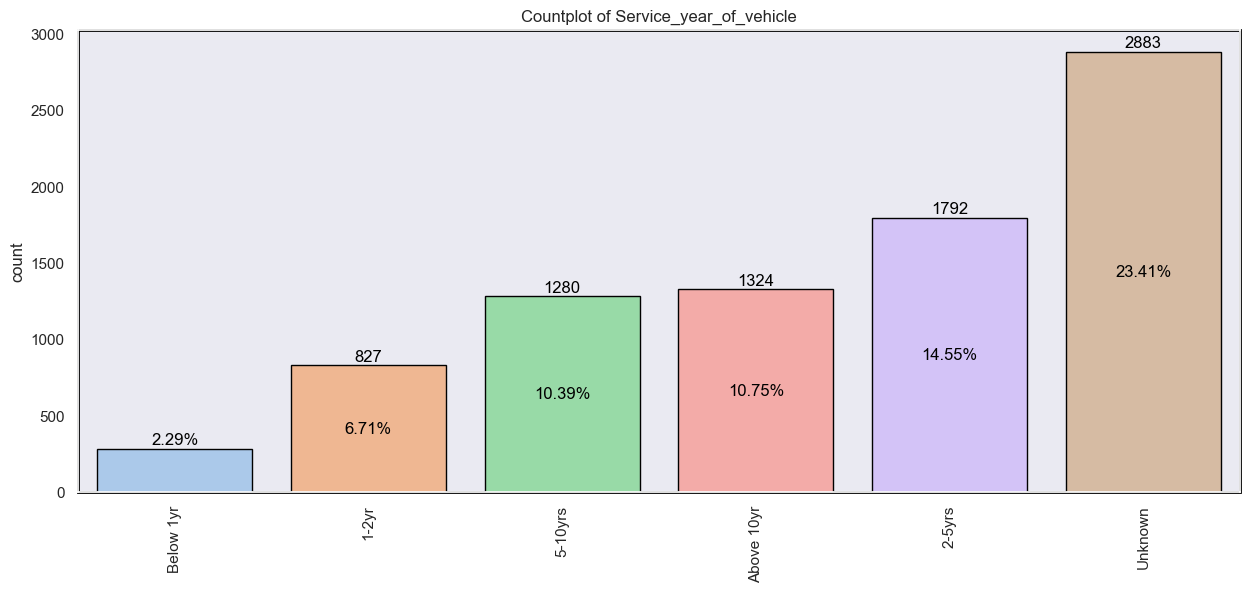

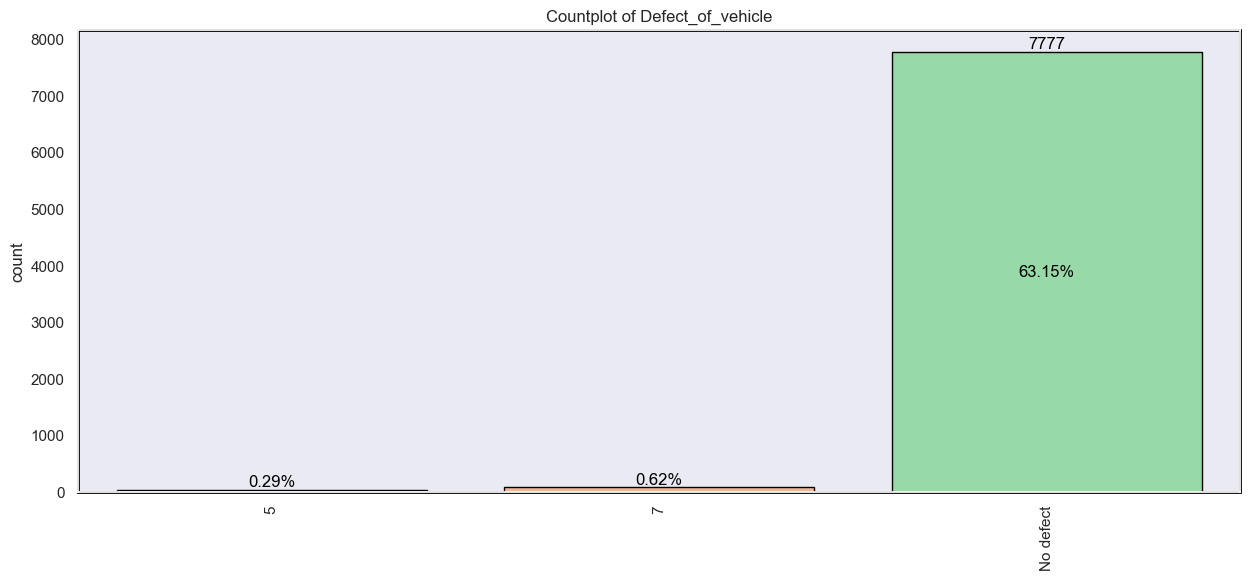

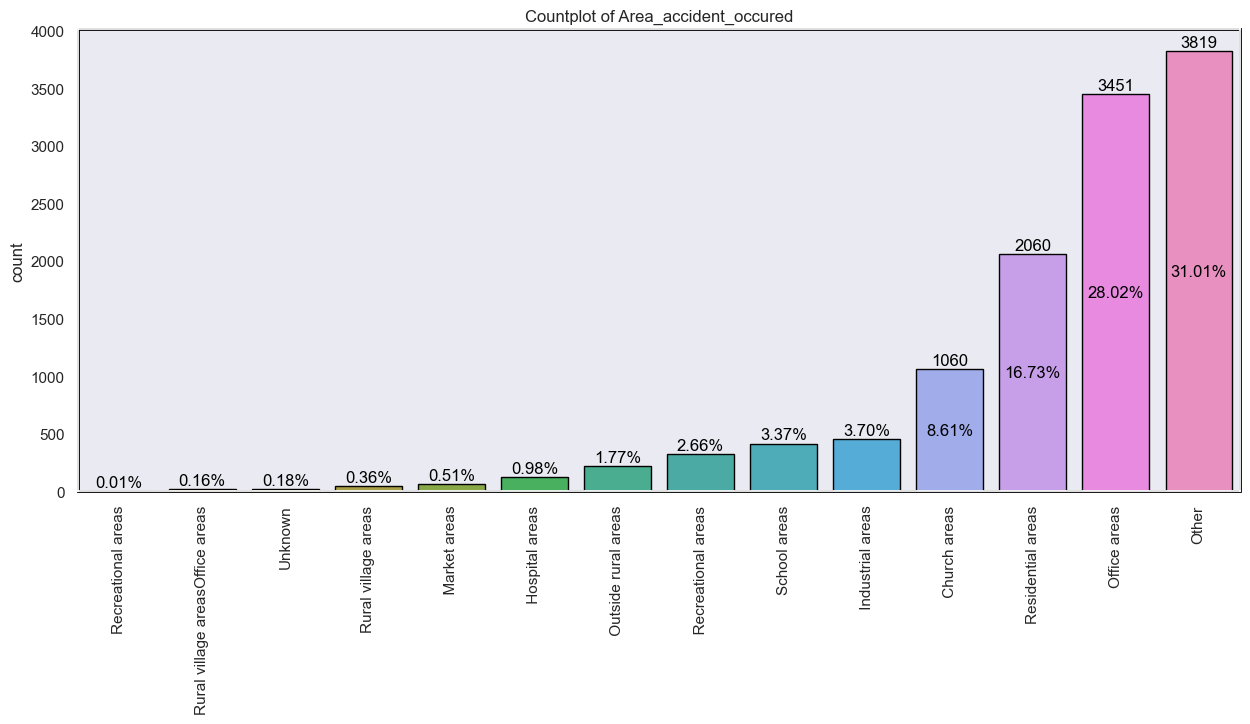

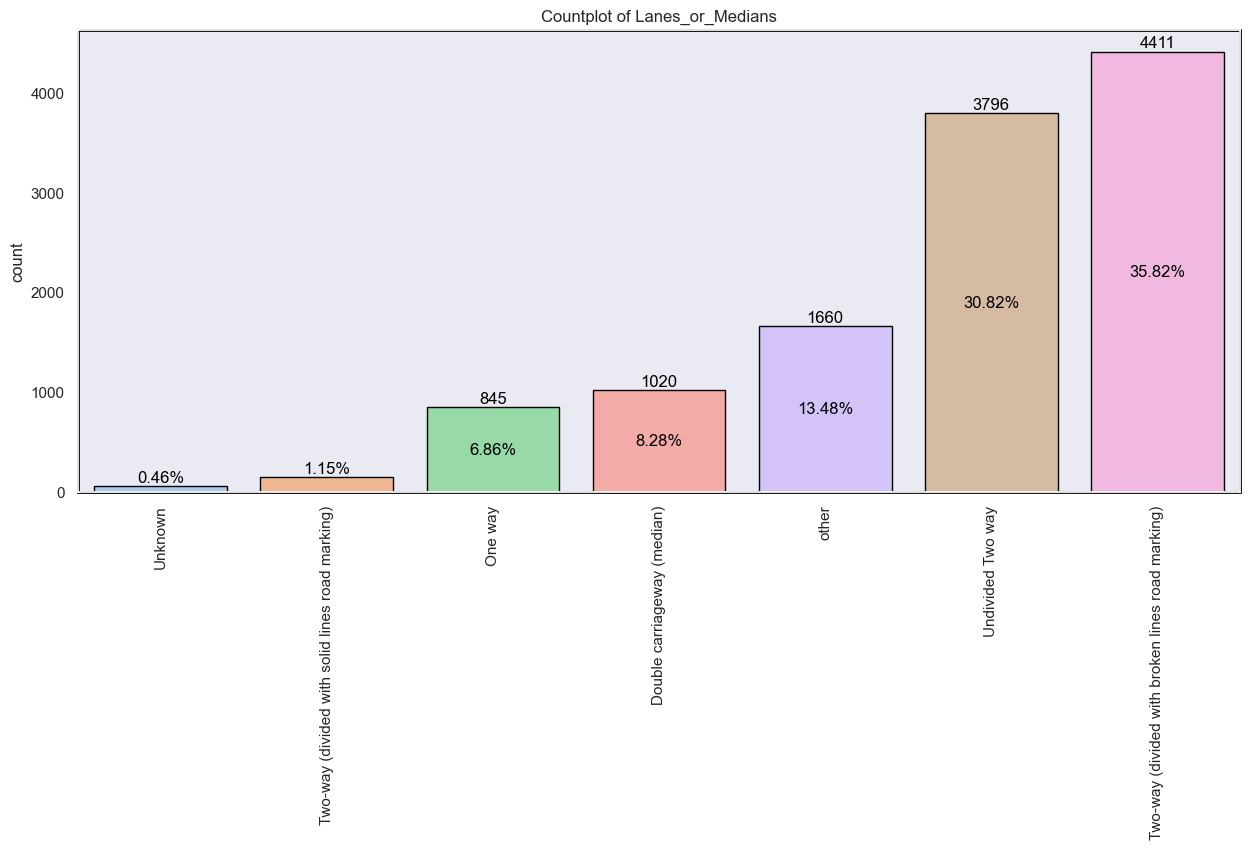

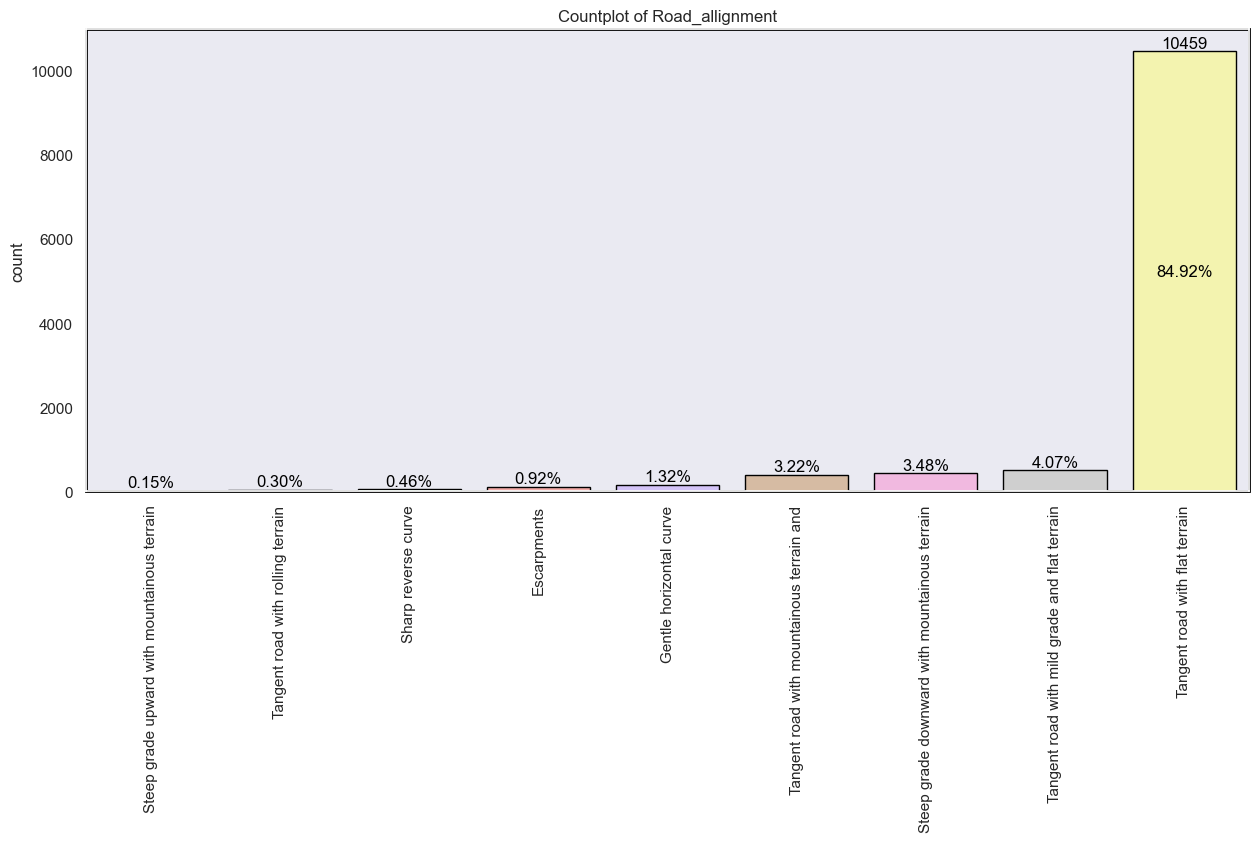

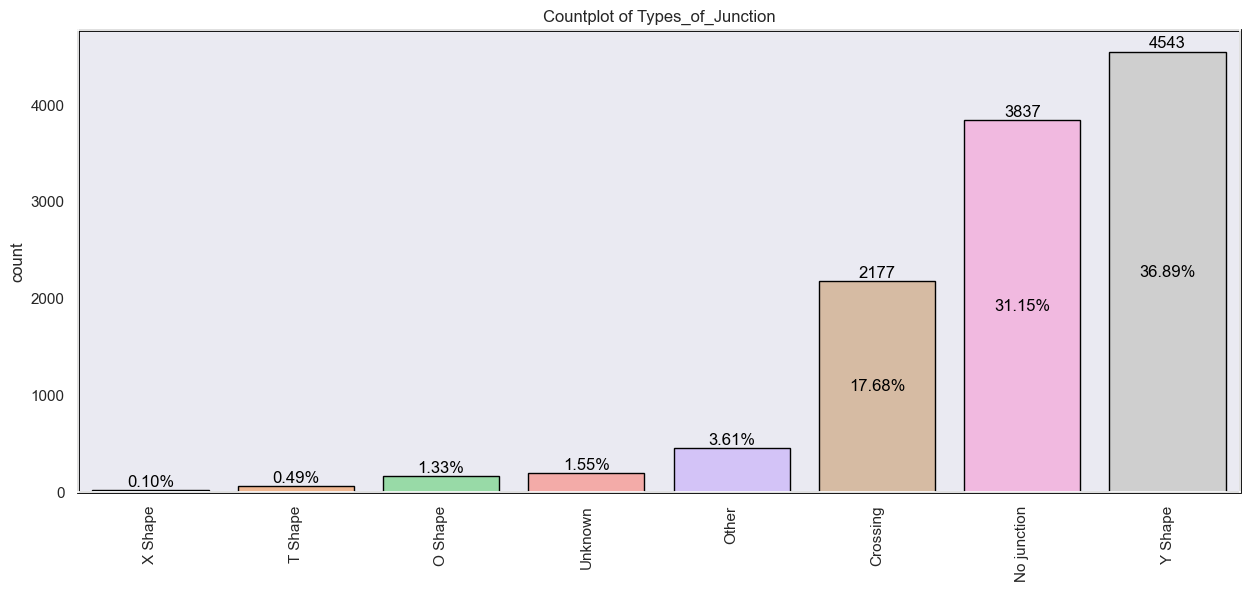

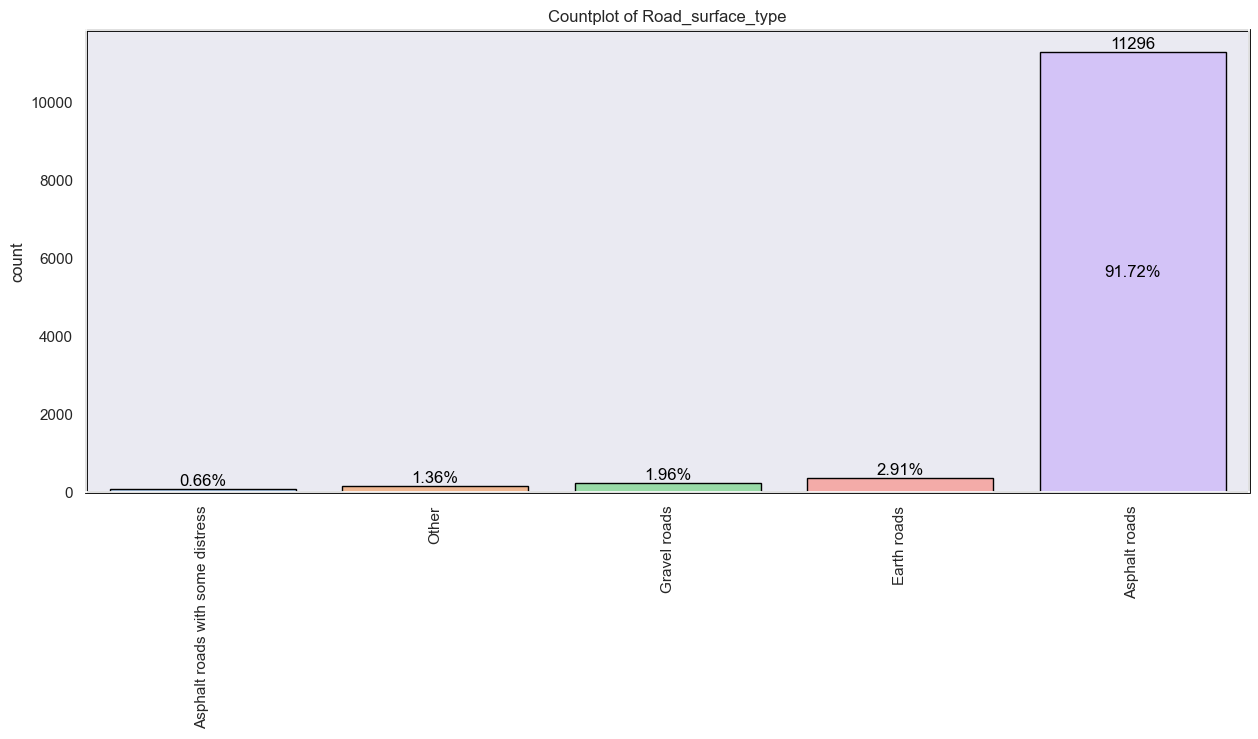

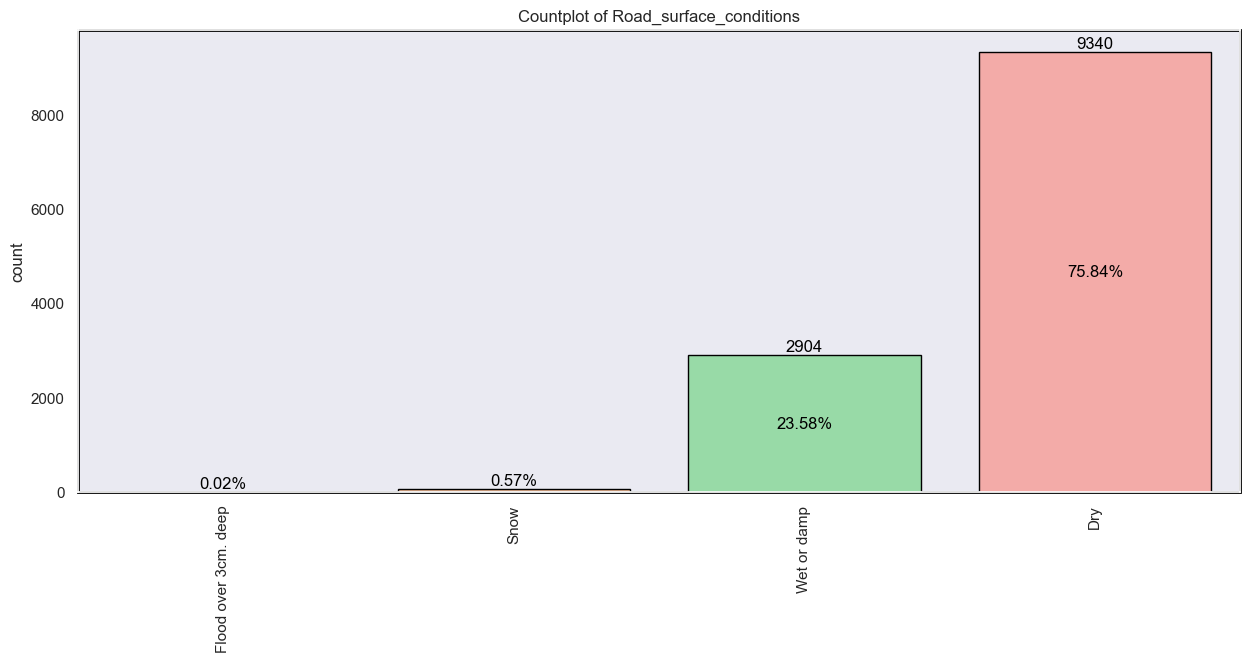

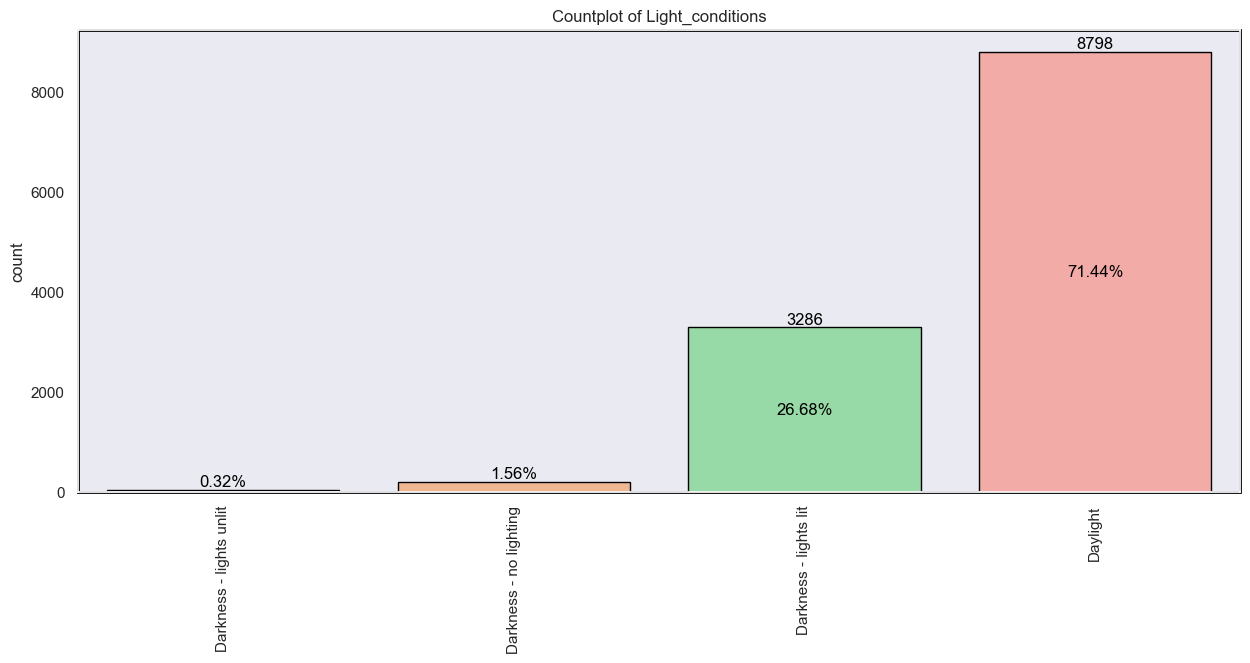

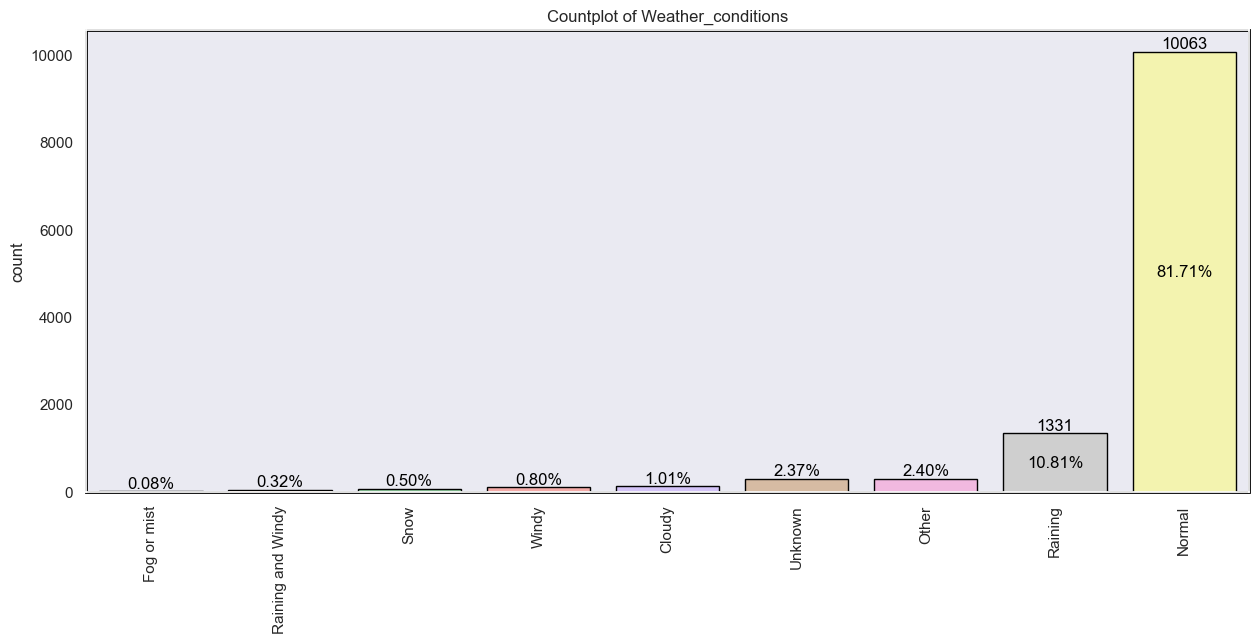

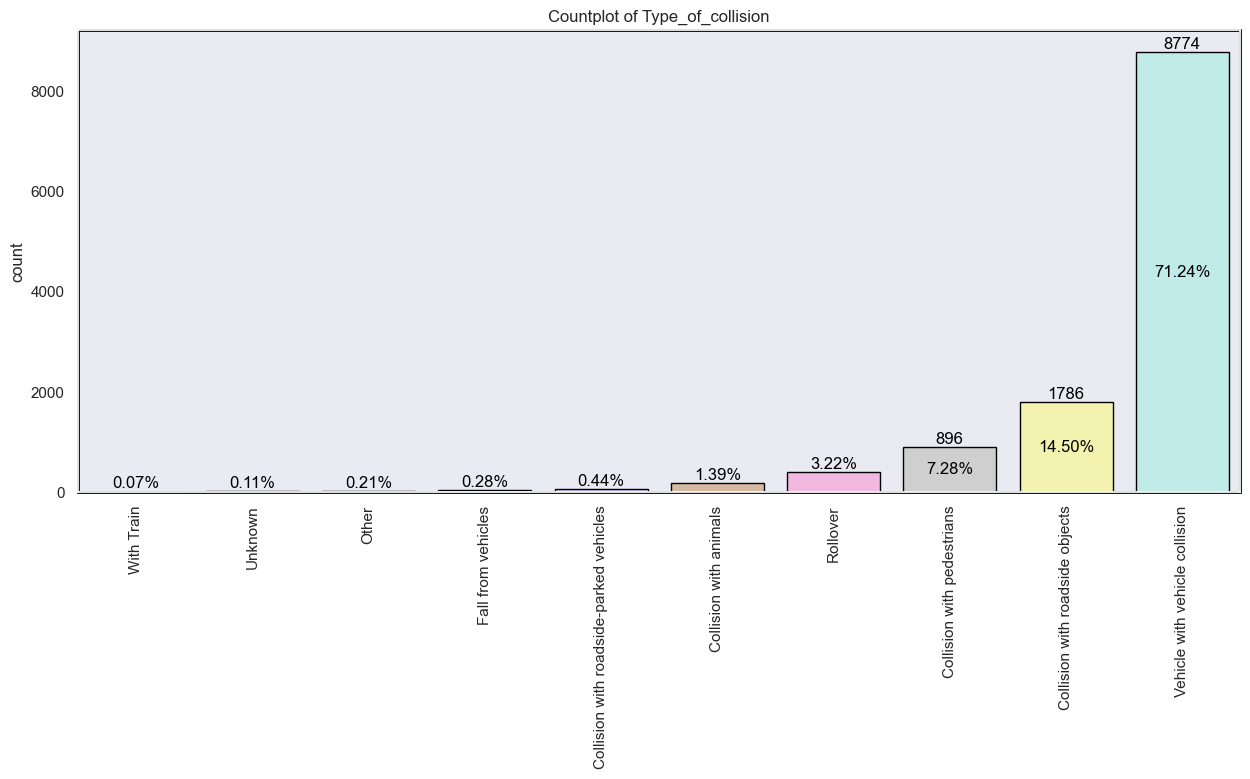

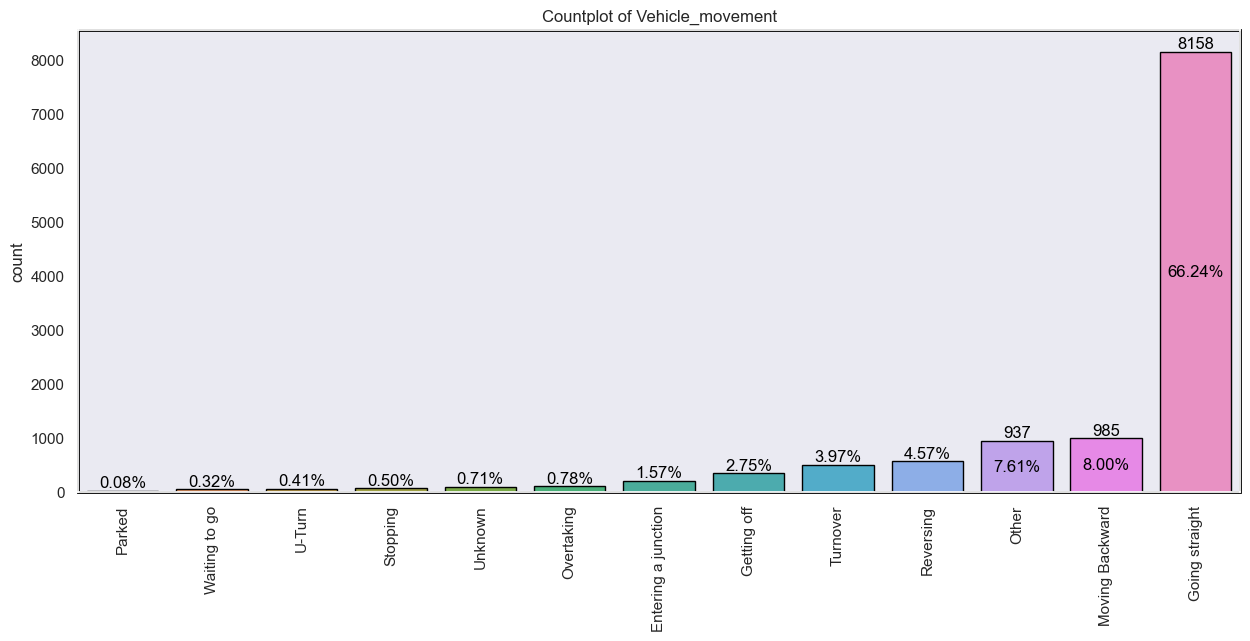

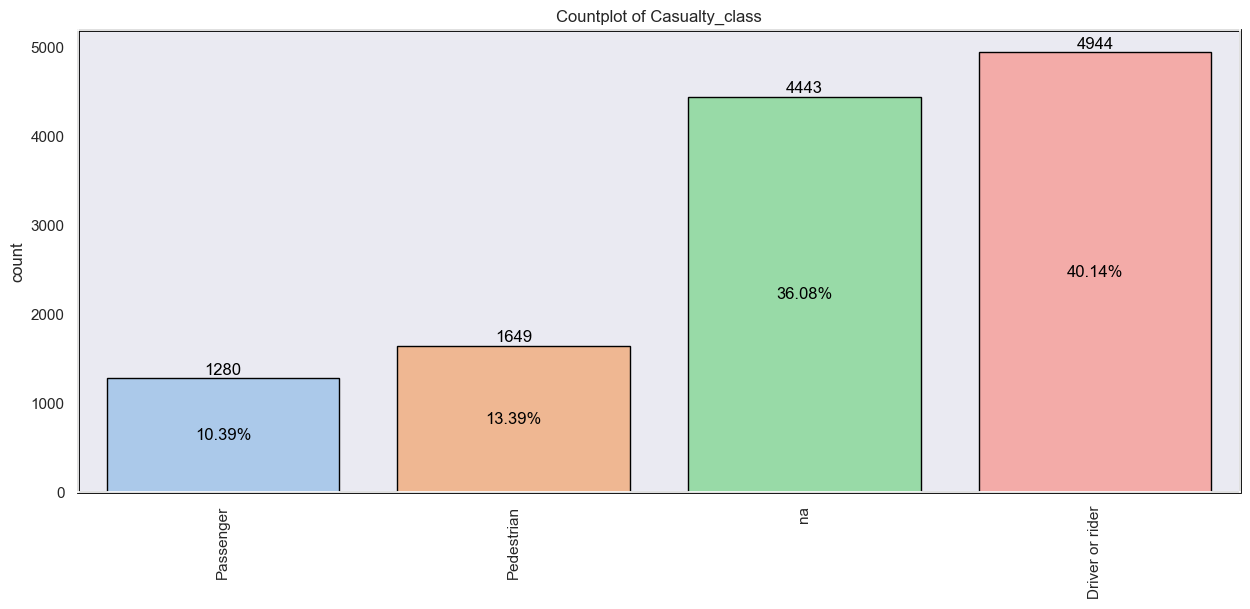

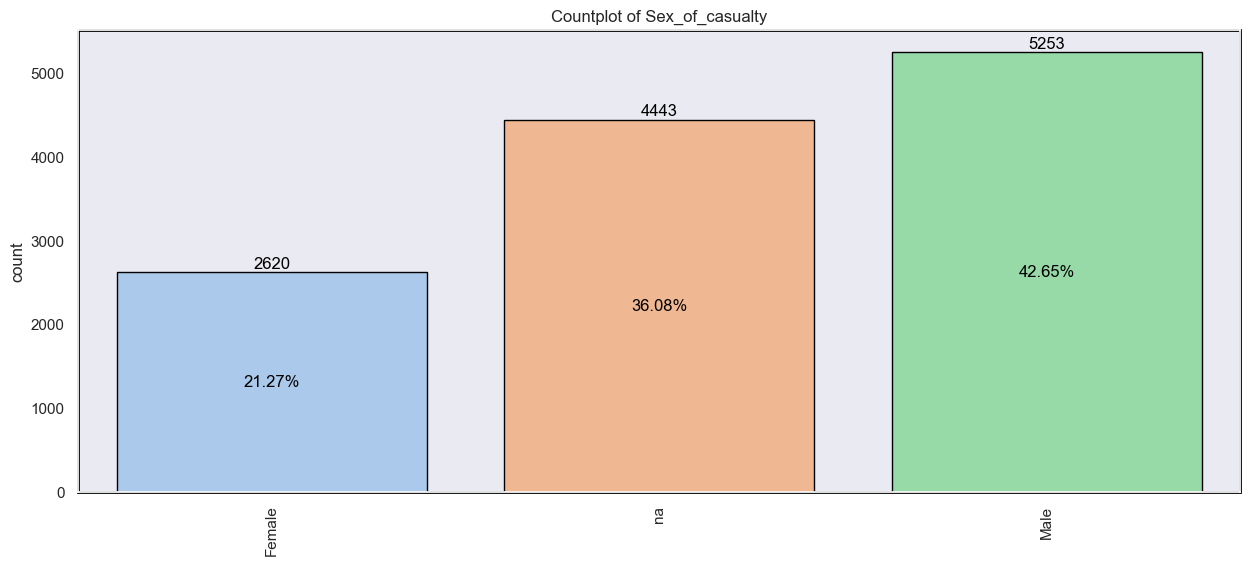

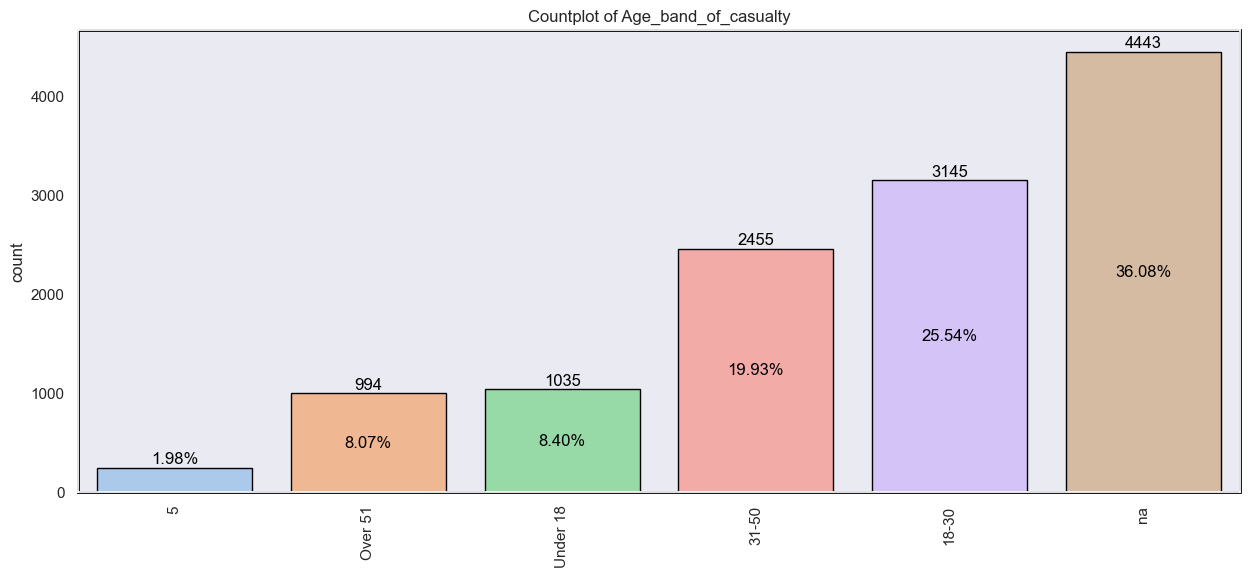

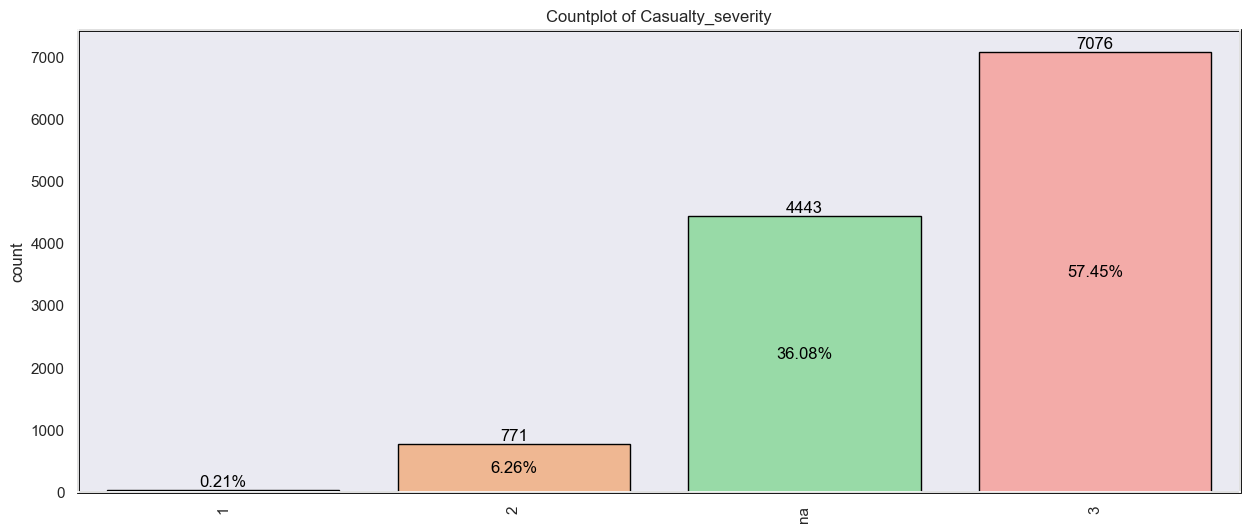

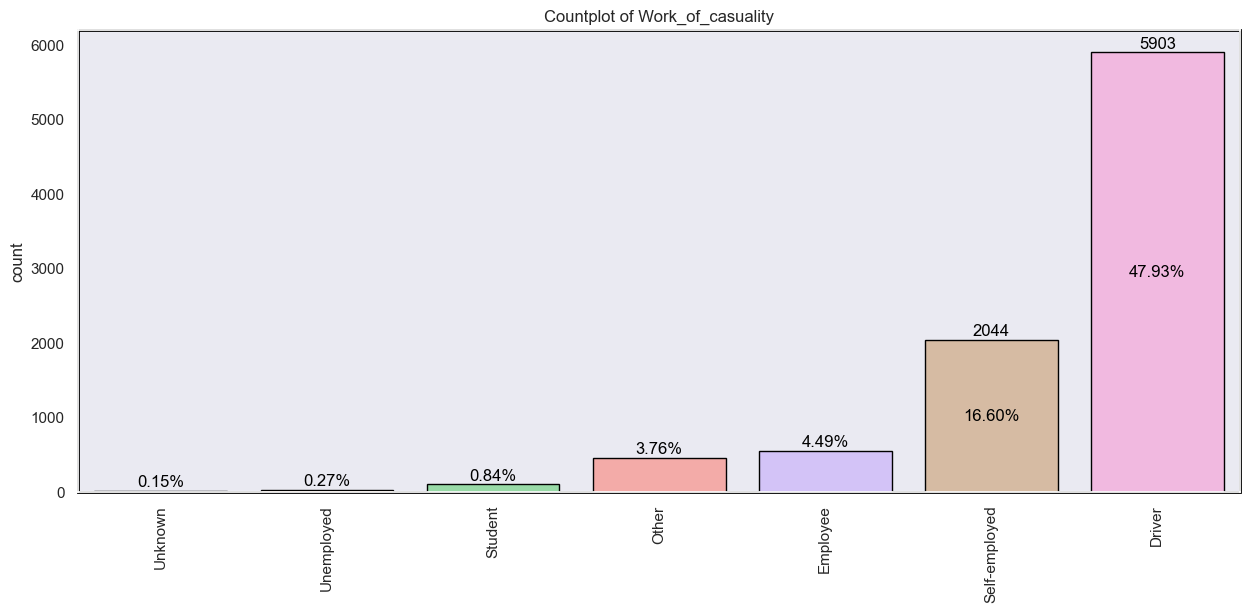

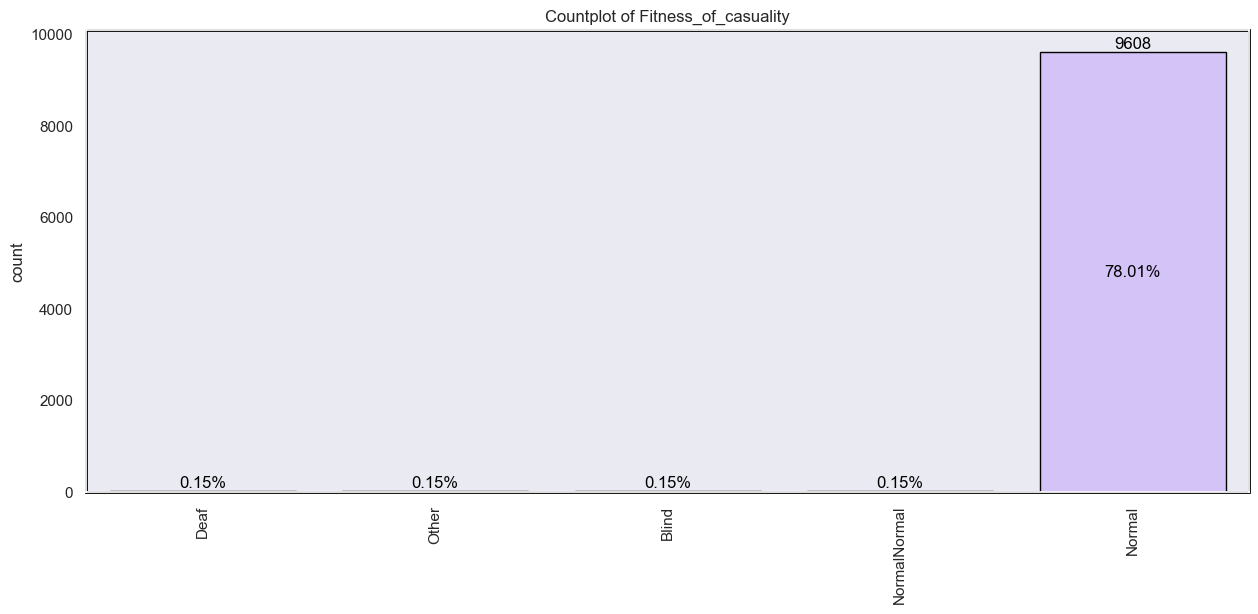

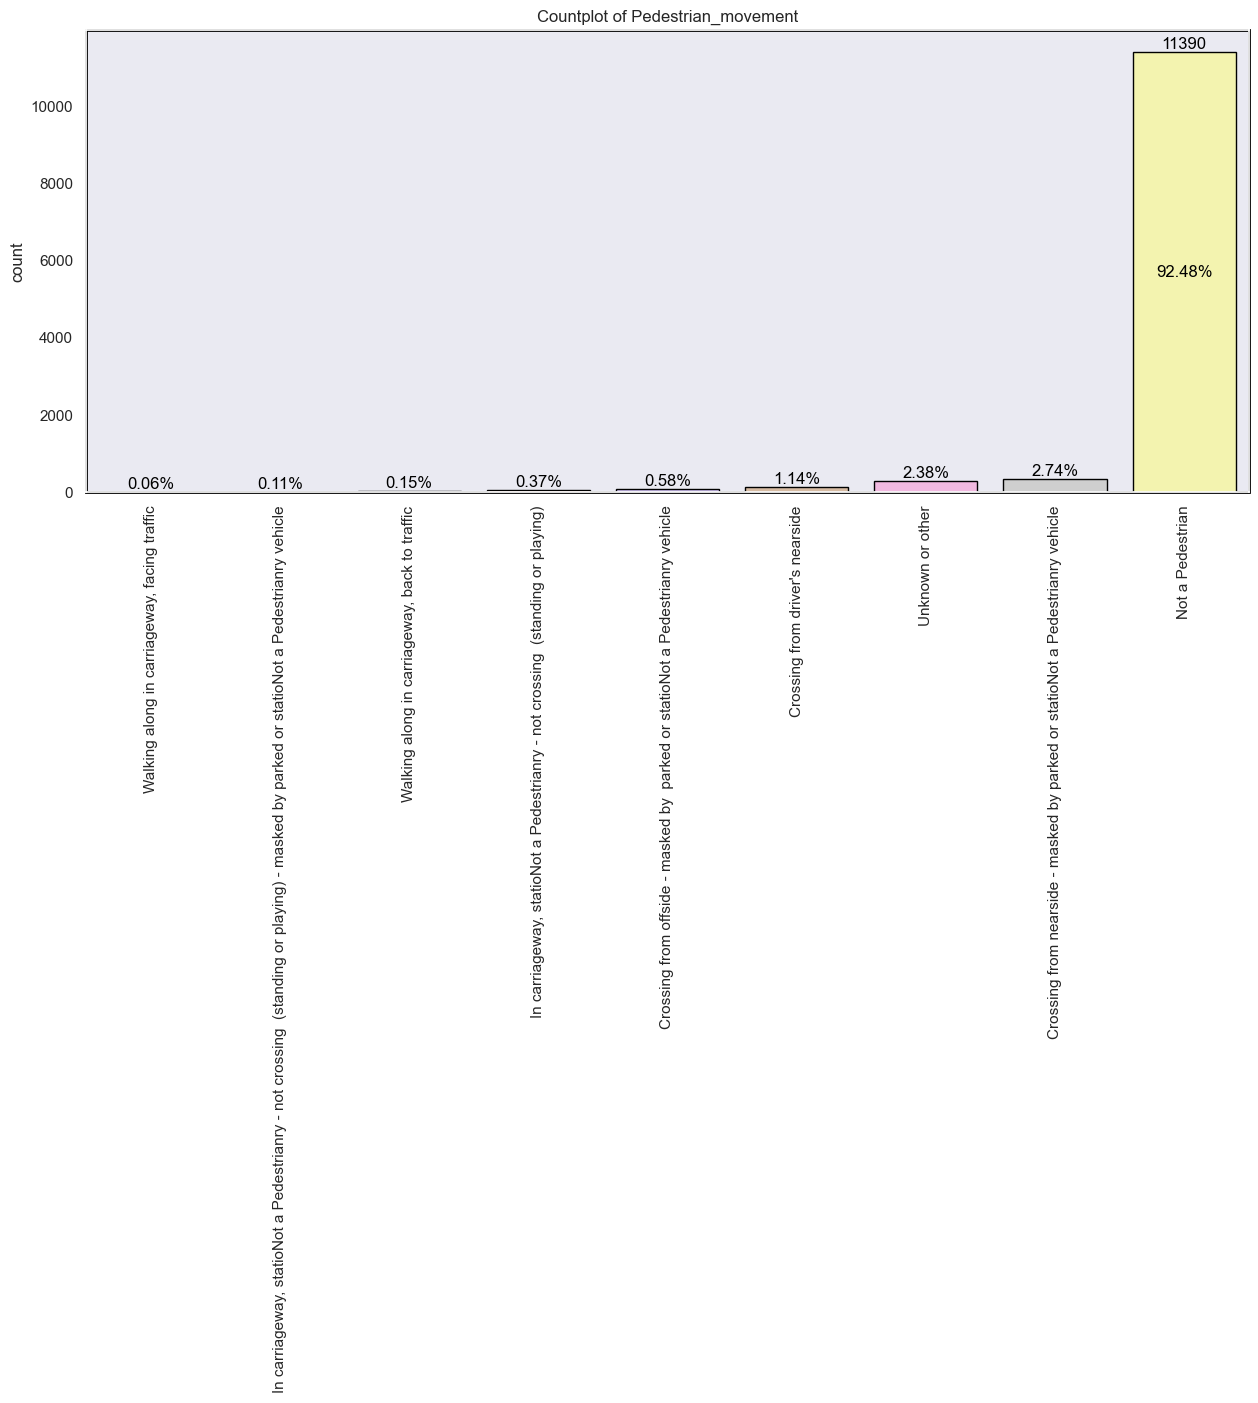

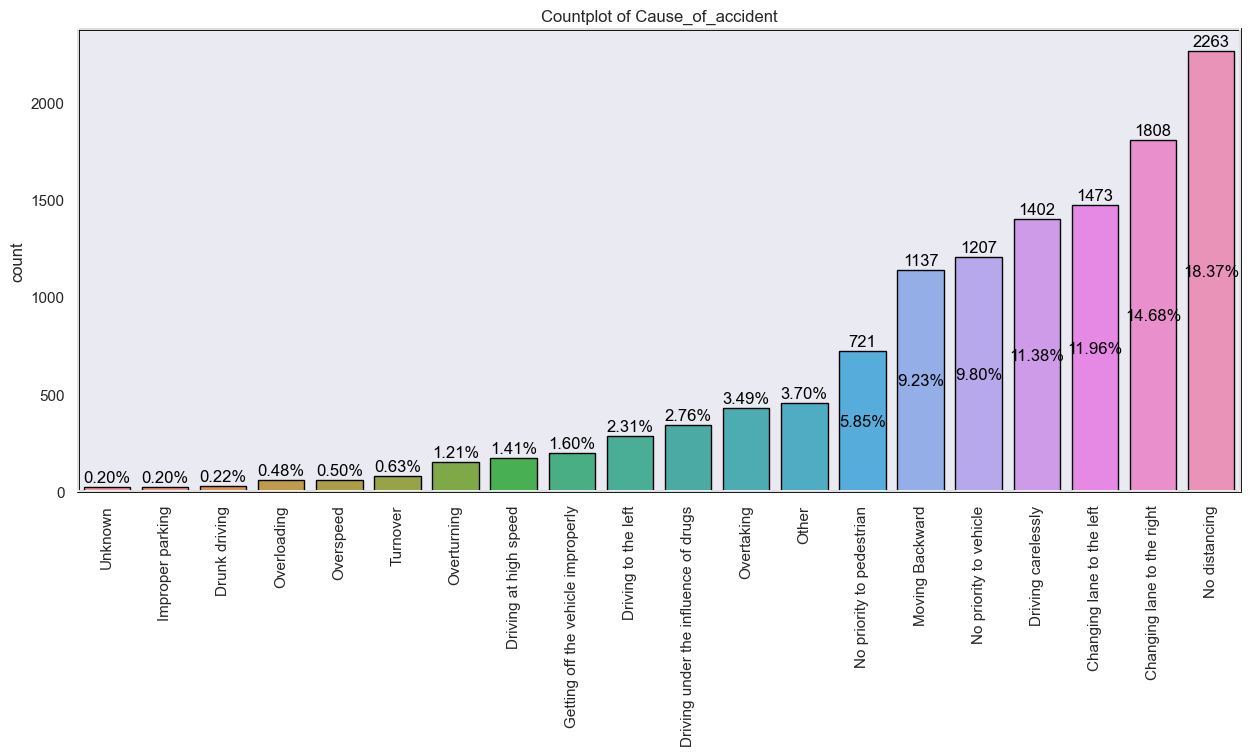

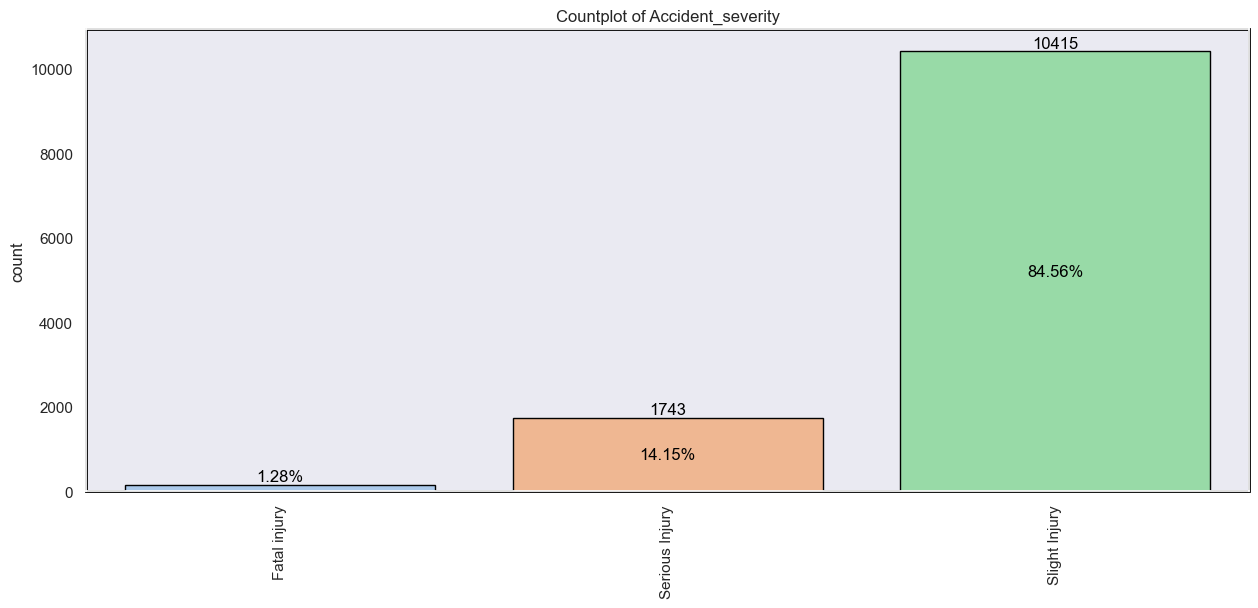

In [16]:
plot_categorical_countplots(df_eda, 20)

<h2 id = 'preprocessing'>Preprocessing</h2>

<h3 id = 'renaming-column-name-to-lowercase'>Renaming column name to lowercase</h3>

In [17]:
df_rename_columns = df_eda.copy(deep=True)

df_rename_columns.rename(columns=lambda x: x.lower(), inplace=True)
columns_in_a_dataframe(df_rename_columns)

Number of columns: 32
['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'number_of_vehicles_involved', 'number_of_casualties', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity']



<h3 id = 'extracting-hour-feature-from-time-feature'>Extracting hour feature from time feature</h3>

In [18]:
df_datetime = df_rename_columns.copy(deep=True)

df_datetime['time'] = pd.to_datetime(df_datetime['time'])

# Extracting the hour from time variable and storing it into new column
df_datetime['hour'] = df_datetime['time'].dt.hour

# Dropping the time column
df_datetime.drop(['time'], axis=1, inplace=True)

columns_in_a_dataframe(df_datetime)

Number of columns: 32
['day_of_week', 'age_band_of_driver', 'sex_of_driver', 'educational_level', 'vehicle_driver_relation', 'driving_experience', 'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle', 'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'road_allignment', 'types_of_junction', 'road_surface_type', 'road_surface_conditions', 'light_conditions', 'weather_conditions', 'type_of_collision', 'number_of_vehicles_involved', 'number_of_casualties', 'vehicle_movement', 'casualty_class', 'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement', 'cause_of_accident', 'accident_severity', 'hour']



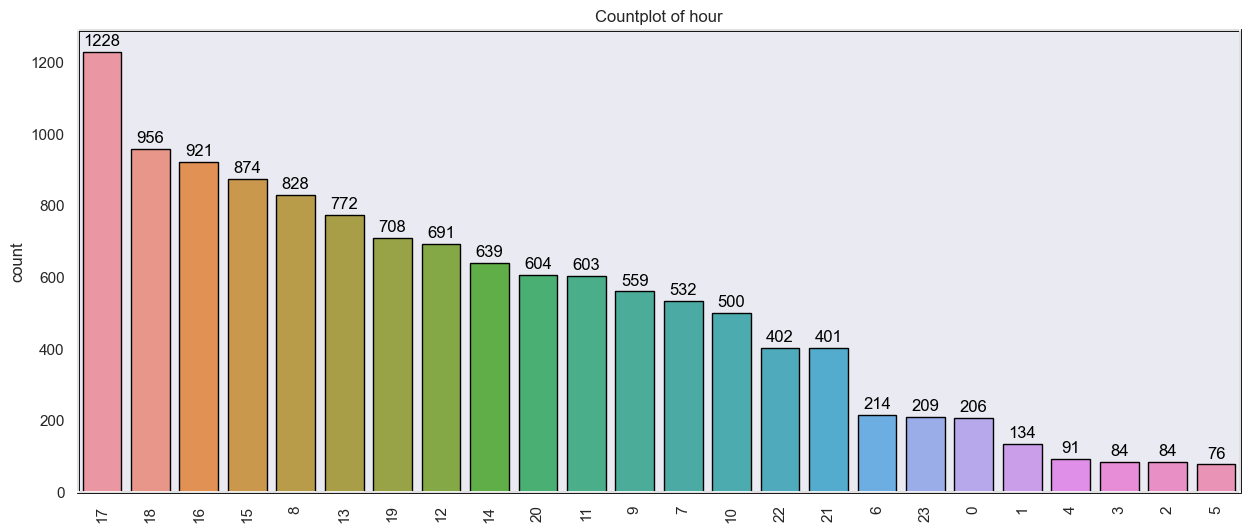

In [19]:
plot_single_numerical_countplot(df_datetime, 'hour')

<h3 id = 'inconsistent-data-treatment'>Inconsistent data treatment</h3>

In [20]:
df_inconsitent = df_datetime.copy(deep=True)

# Replace '7' and '5' with 'No_defect' in column 'Defect_of_vehicle'
df_inconsitent['defect_of_vehicle'] = df_inconsitent['defect_of_vehicle'].replace(['7', '5'], 'Defective')

# Replace 'NormalNormal' with 'Normal' in Fitness_of_casuality column
df_inconsitent['fitness_of_casuality'] = df_inconsitent['fitness_of_casuality'].replace('NormalNormal', 'Normal')

df_inconsitent.replace(['na', 'Unknown', 'unknown','Other', 'Unknown or other'], np.nan, inplace=True)

missing_values_table(df_inconsitent)

Your selected dataframe has 32 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values
service_year_of_vehicle,6811,55.3
casualty_class,4443,36.1
casualty_severity,4443,36.1
age_band_of_casualty,4443,36.1
sex_of_casualty,4443,36.1
defect_of_vehicle,4427,35.9
area_accident_occured,4080,33.1
work_of_casuality,3680,29.9
fitness_of_casuality,2653,21.5
type_of_vehicle,2158,17.5


<h3 id = "imputing-missing-values">Imputing Missing values</h3>

In [21]:
df_to_impute = df_inconsitent.copy(deep=True)

# Fuction defined above that imputes with mode when missing value % <= 10% and greater than that with a new value called 'Unknown'.
impute_categorical_missing(df_to_impute)
df_to_impute.isnull().sum()

day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
vehicle_driver_relation        0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
service_year_of_vehicle        0
defect_of_vehicle              0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
type_of_collision              0
number_of_vehicles_involved    0
number_of_casualties           0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
work_of_casuality              0
fitness_of_casuality           0
pedestrian_movement            0
cause_of_accident              0
accident_s

In [22]:
df_to_impute['light_conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       'Darkness - lights unlit'], dtype=object)

In [23]:
df_ordinal_encode = df_to_impute.copy(deep=True)

ordinal_encoder(df_ordinal_encode, df_ordinal_encode.drop(['hour', 'accident_severity', 'number_of_vehicles_involved', 'number_of_casualties'], axis=1).columns)

df_ordinal_encode.head()

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour
0,2,1,2,1,1,1,1,3,4,2,9,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,4,6,10,Slight Injury,17
1,2,2,2,5,1,4,11,3,3,2,7,5,6,2,1,1,4,3,7,2,2,3,4,3,6,4,6,4,6,16,Slight Injury,17
2,2,1,2,5,1,1,6,3,6,2,2,6,6,2,1,1,4,3,3,2,2,3,1,2,2,3,1,4,6,1,Serious Injury,17
3,4,1,2,5,1,3,11,1,6,2,7,6,7,7,3,1,1,3,7,2,2,3,3,1,1,3,1,3,6,2,Slight Injury,1
4,4,1,2,5,1,2,17,3,3,2,5,6,6,7,1,1,1,3,7,2,2,3,4,3,6,4,6,4,6,16,Slight Injury,1


<h3 id = "imbalanced-data-treatment">Imbalanced data treatment</h3>

In [24]:
df_tobalance = df_ordinal_encode.copy(deep=True)

X = df_tobalance.drop('accident_severity', axis=1)
y = df_tobalance['accident_severity']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
print(X_resampled.shape)
print(y_resampled.shape)

(31245, 31)
(31245,)


<h2 id = "modelling">Modelling</h2>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

<h3 id = "logistic-regression">Logistic Regression</h3>

In [28]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5629400469383401
F1 Score: 0.5629029038642959
Confusion Matrix:
 [[1892  747  487]
 [ 683 1584  877]
 [ 517  786 1801]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.61      0.61      0.61      3126
Serious Injury       0.51      0.50      0.51      3144
 Slight Injury       0.57      0.58      0.57      3104

      accuracy                           0.56      9374
     macro avg       0.56      0.56      0.56      9374
  weighted avg       0.56      0.56      0.56      9374



<h3 id = "random-forest-classifier">Random Forest Classifier</h3>

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.9223383827608278
F1 Score: 0.9223092754437231
Confusion Matrix:
 [[3116    3    7]
 [   7 2757  380]
 [   8  323 2773]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00      3126
Serious Injury       0.89      0.88      0.89      3144
 Slight Injury       0.88      0.89      0.89      3104

      accuracy                           0.92      9374
     macro avg       0.92      0.92      0.92      9374
  weighted avg       0.92      0.92      0.92      9374



<h3 id = "xgboost">XGboost</h3>

In [30]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions
y_xgb_pred_encoded = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test_encoded, y_xgb_pred_encoded)
f1_xgb = f1_score(y_test_encoded, y_xgb_pred_encoded, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_xgb_pred_encoded)
class_report_xgb = classification_report(y_test_encoded, y_xgb_pred_encoded)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)

Accuracy: 0.9180712609344996
F1 Score: 0.9178588621636311
Confusion Matrix:
 [[3112    3   11]
 [  19 2667  458]
 [  23  254 2827]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3126
           1       0.91      0.85      0.88      3144
           2       0.86      0.91      0.88      3104

    accuracy                           0.92      9374
   macro avg       0.92      0.92      0.92      9374
weighted avg       0.92      0.92      0.92      9374



<h3 id = "k-nearest-neighbors-knn-classifier">K-Nearest Neighbors (KNN) classifier</h3> 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

X_test = np.array(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_knn_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_knn_pred)
f1_knn = f1_score(y_test, y_knn_pred, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_knn_pred)
class_report_knn = classification_report(y_test, y_knn_pred)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"F1 Score: {f1_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

Accuracy: 0.8131000640068274
F1 Score: 0.7926773109235011
Confusion Matrix:
 [[3126    0    0]
 [  32 3073   39]
 [ 460 1221 1423]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.86      1.00      0.93      3126
Serious Injury       0.72      0.98      0.83      3144
 Slight Injury       0.97      0.46      0.62      3104

      accuracy                           0.81      9374
     macro avg       0.85      0.81      0.79      9374
  weighted avg       0.85      0.81      0.79      9374



**Random Forest Classifier has the Highest Accuracy of about 92% and Highest F1 score of approximately 0.9223.**

<h3 id = "explainable-ai">Explainable AI</h3>
Using Random Forest Classifier's inbuilt feature importance.

In [32]:
importances = rf_classifier.feature_importances_

# Calculate the total importance sum
total_importance = np.sum(importances)

# Sort feature importances in descending order and get corresponding feature names
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Replace with your feature names or labels

# Print the feature ranking with percentages
print("Feature ranking:")
for f in range(len(indices)):
    importance_percentage = (importances[indices[f]] / total_importance) * 100
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importance_percentage:.2f}%)")

Feature ranking:
1. Feature 'hour' (7.25%)
2. Feature 'day_of_week' (5.68%)
3. Feature 'cause_of_accident' (5.67%)
4. Feature 'number_of_casualties' (5.66%)
5. Feature 'number_of_vehicles_involved' (5.48%)
6. Feature 'type_of_vehicle' (5.47%)
7. Feature 'area_accident_occured' (4.86%)
8. Feature 'types_of_junction' (4.81%)
9. Feature 'age_band_of_driver' (4.68%)
10. Feature 'driving_experience' (4.56%)
11. Feature 'lanes_or_medians' (4.08%)
12. Feature 'light_conditions' (4.01%)
13. Feature 'vehicle_movement' (3.46%)
14. Feature 'service_year_of_vehicle' (3.40%)
15. Feature 'work_of_casuality' (3.25%)
16. Feature 'type_of_collision' (3.04%)
17. Feature 'road_surface_conditions' (2.94%)
18. Feature 'educational_level' (2.94%)
19. Feature 'age_band_of_casualty' (2.74%)
20. Feature 'defect_of_vehicle' (2.46%)
21. Feature 'casualty_class' (2.01%)
22. Feature 'sex_of_casualty' (1.77%)
23. Feature 'road_allignment' (1.48%)
24. Feature 'casualty_severity' (1.46%)
25. Feature 'owner_of_vehicle

In [33]:
importance_threshold = 4.0  # You can adjust this threshold as needed

# Create a list of features with importance greater than the threshold
important_features = [
    feature_names[i] for i in range(len(feature_names))
    if importances[i] > (importance_threshold / 100)  # Convert threshold to a fraction
]

# Print the list of important features
print("Important Features with Importance > 4%:")
print(important_features)

Important Features with Importance > 4%:
['day_of_week', 'age_band_of_driver', 'driving_experience', 'type_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'types_of_junction', 'light_conditions', 'number_of_vehicles_involved', 'number_of_casualties', 'cause_of_accident', 'hour']


In [34]:
df_top_feature = df_ordinal_encode.copy(deep=True)

X = df_top_feature[important_features]
y = df_top_feature['accident_severity']

columns_in_a_dataframe(X)

Number of columns: 12
['day_of_week', 'age_band_of_driver', 'driving_experience', 'type_of_vehicle', 'area_accident_occured', 'lanes_or_medians', 'types_of_junction', 'light_conditions', 'number_of_vehicles_involved', 'number_of_casualties', 'cause_of_accident', 'hour']



In [35]:
smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [37]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.9090036270535524
F1 Score: 0.9087740390320213
Confusion Matrix:
 [[3114    5    7]
 [  17 2728  399]
 [  30  395 2679]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.99      1.00      0.99      3126
Serious Injury       0.87      0.87      0.87      3144
 Slight Injury       0.87      0.86      0.87      3104

      accuracy                           0.91      9374
     macro avg       0.91      0.91      0.91      9374
  weighted avg       0.91      0.91      0.91      9374



In [38]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
# }

# # Create the RandomForestClassifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Create GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [39]:
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

# Use the best hyperparameters to train the final model
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions with the tuned model
y_rf_pred = best_rf_classifier.predict(X_test)

# Evaluate the tuned model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.9120972903776403
F1 Score: 0.9118838998484766
Confusion Matrix:
 [[3115    3    8]
 [  22 2726  396]
 [  23  372 2709]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.99      1.00      0.99      3126
Serious Injury       0.88      0.87      0.87      3144
 Slight Injury       0.87      0.87      0.87      3104

      accuracy                           0.91      9374
     macro avg       0.91      0.91      0.91      9374
  weighted avg       0.91      0.91      0.91      9374



In [40]:
import joblib

# Define the file path where you want to save the model
model_file_path = '../Model/best_randomforest_model.joblib'

# Save the trained model to a .joblib file
joblib.dump(best_rf_classifier, model_file_path)

print(f"Model saved as {model_file_path}")

Model saved as ../Model/best_randomforest_model.joblib
